In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2.0.3


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Load the data
file_path = '/content/gdrive/MyDrive/DeepLearning/Data/PSV_merchandise_shared.xlsx'  #add file path
df = pd.read_excel(file_path)

df.head()
for col in df.columns:
    print(col)

In [ ]:
# Display unique users and movie counts
print(f"\nUnique users: {df.fan_id.nunique()}")
# Display the descriptive statistics for the numerical columns
print(df.describe())

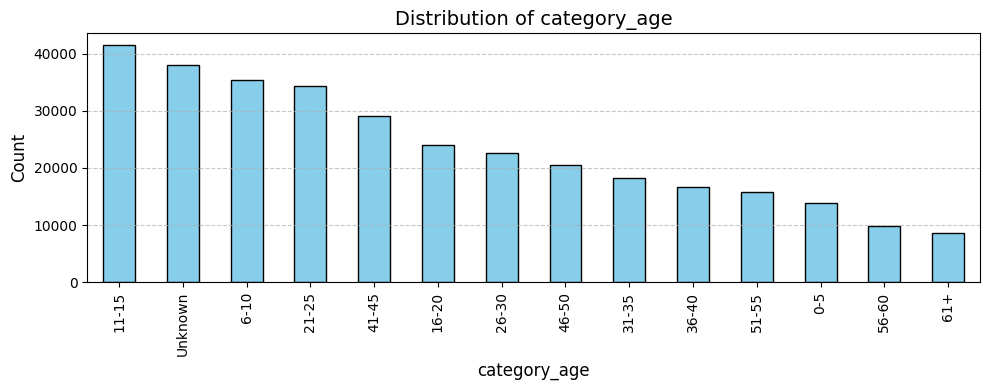

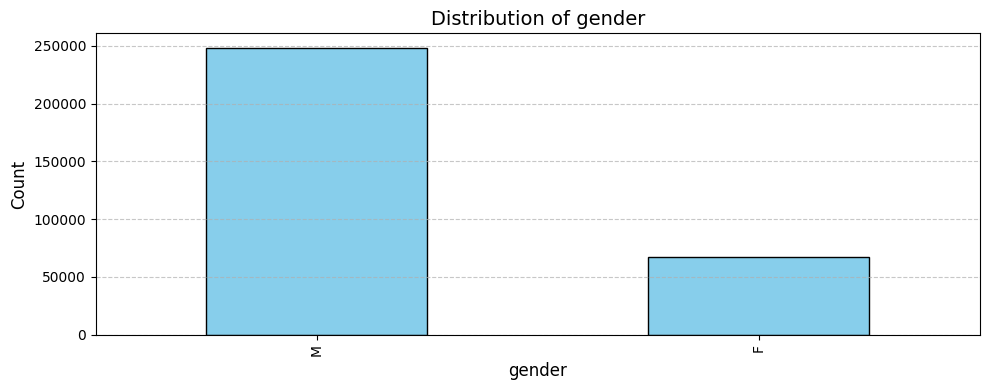

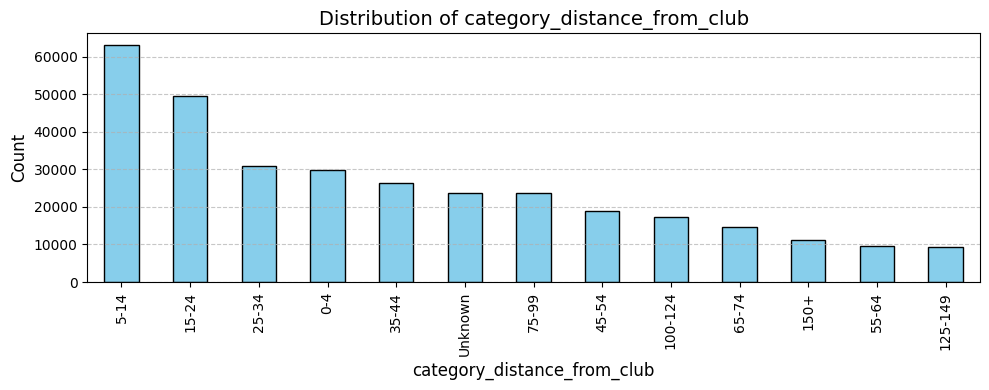

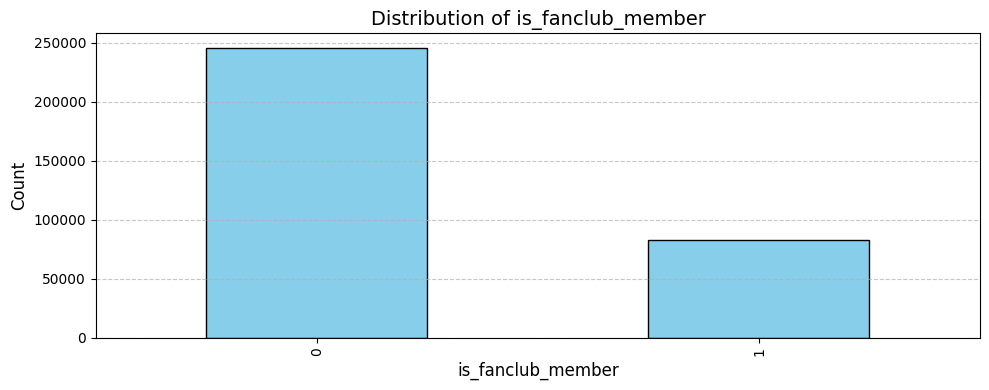

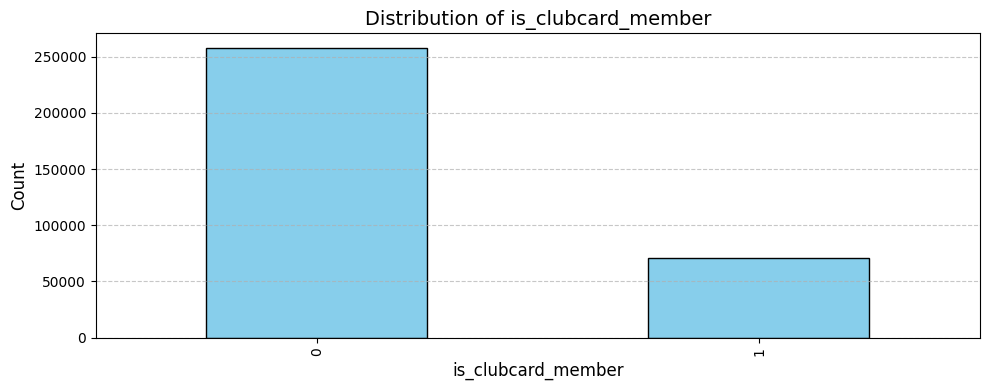

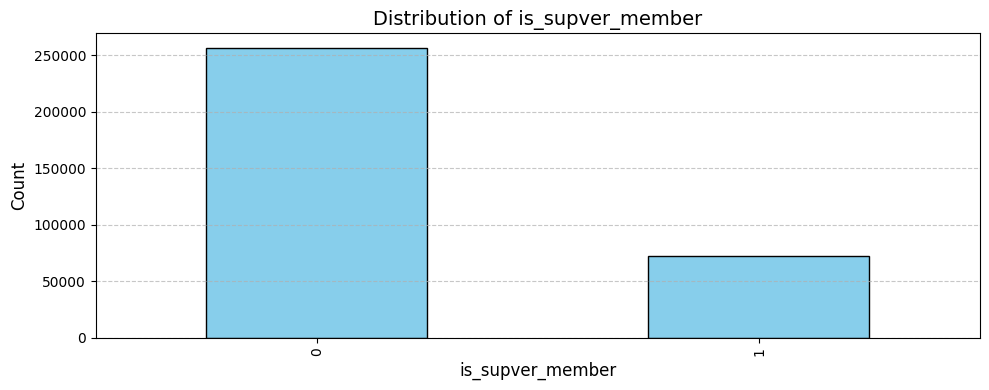

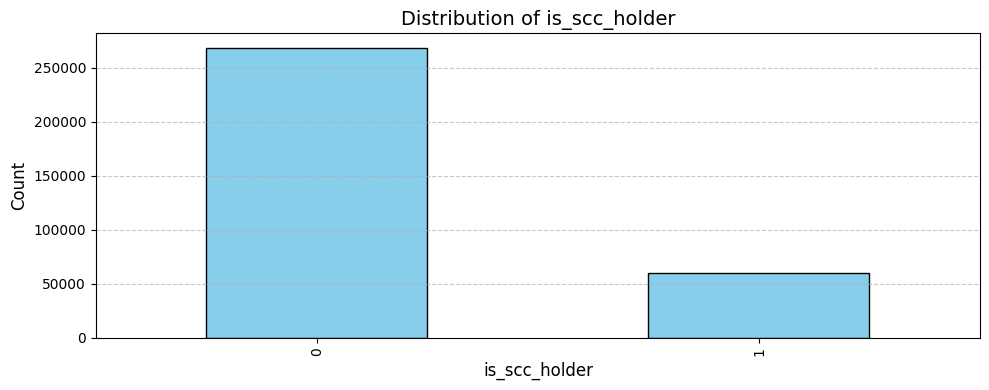

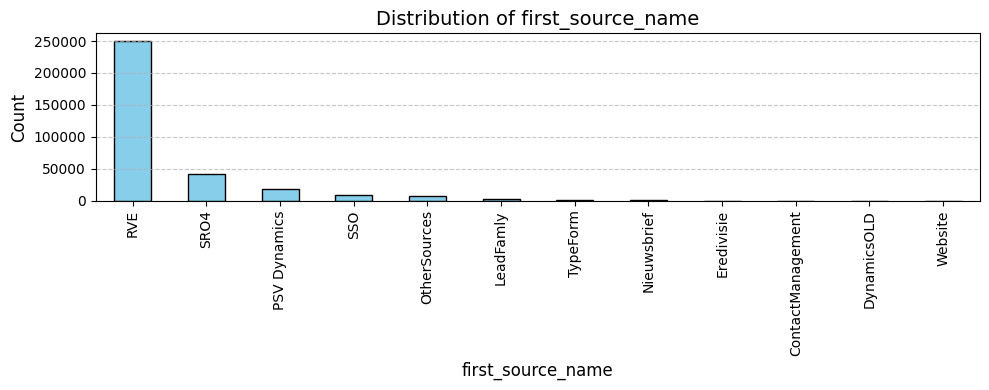

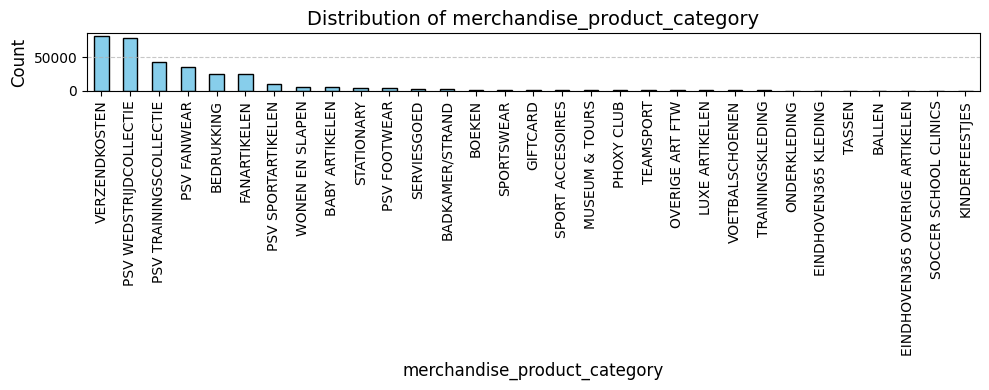

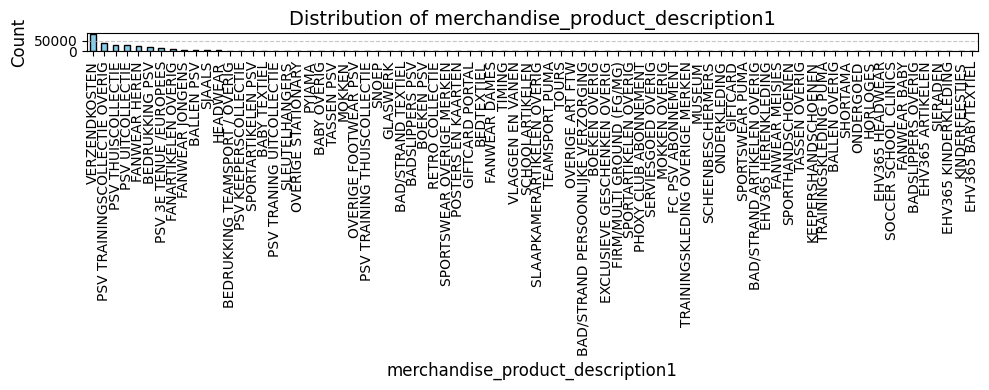

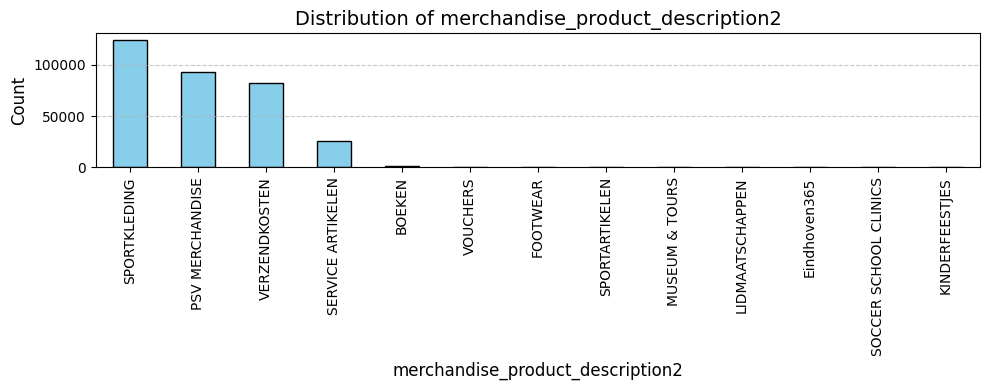

In [ ]:

# Columns to be taken as is (assuming they do not change per user)
static_columns = [
    'DOB', 'year_of_birth', 'age', 'category_age', 'gender',
    'category_distance_from_club', 'distance_from_club', 'is_fanclub_member',
    'is_clubcard_member', 'is_supver_member', 'is_scc_holder',
    'first_source_name', 'year_month_arrival', 'year_arrival'
]



# For categorical data in users, plot the distribution
categorical_columns = [
    'category_age', 'gender', 'category_distance_from_club',
    'is_fanclub_member', 'is_clubcard_member', 'is_supver_member', 'is_scc_holder',
    'first_source_name'
]

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# For categorical data in products, plot the distribution
product_categorical_columns = ['merchandise_product_category' ,'merchandise_product_description1' ,'merchandise_product_description2'
]

for column in product_categorical_columns:
    plt.figure(figsize=(10, 4))
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



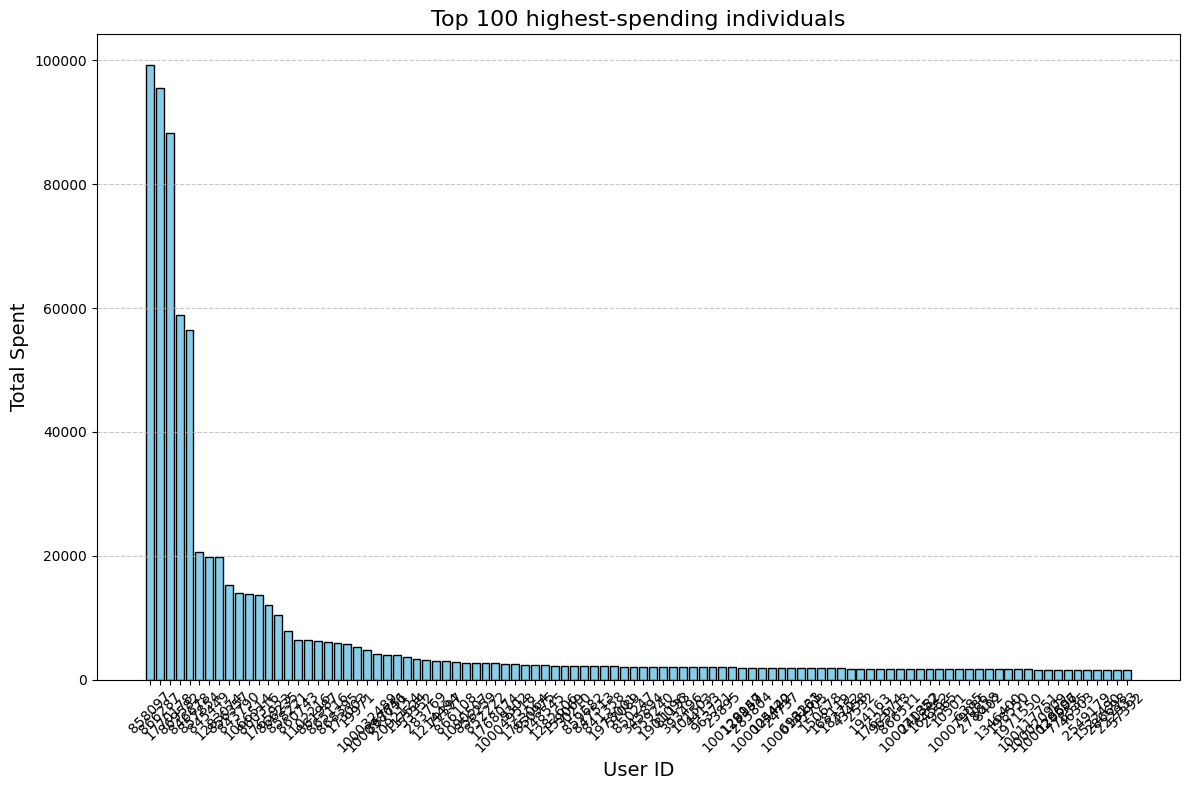

In [ ]:
#Analysis of expenditure patterns
# Columns to sum
spend_columns = ['merchandise_transaction_price']

# Group by 'fan_id', take the first for static and sum for spending
aggregations = {**{col: 'first' for col in static_columns}, **{col: 'sum' for col in spend_columns}}
grouped_df = df.groupby('fan_id').agg(aggregations).reset_index()


top_users = grouped_df.sort_values(by='merchandise_transaction_price', ascending=False).head(100)

# Plotting the top 100 spenders using a vertical bar chart
plt.figure(figsize=(12, 8))  # Adjust the size for better visualization
bars = plt.bar(top_users['fan_id'].astype(str), top_users['merchandise_transaction_price'], color='skyblue', edgecolor='black')

# Adding labels for clarity
plt.title('Top 100 highest-spending individuals', fontsize=16)
plt.xlabel('User ID', fontsize=14)
plt.ylabel('Total Spent', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for better readability

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

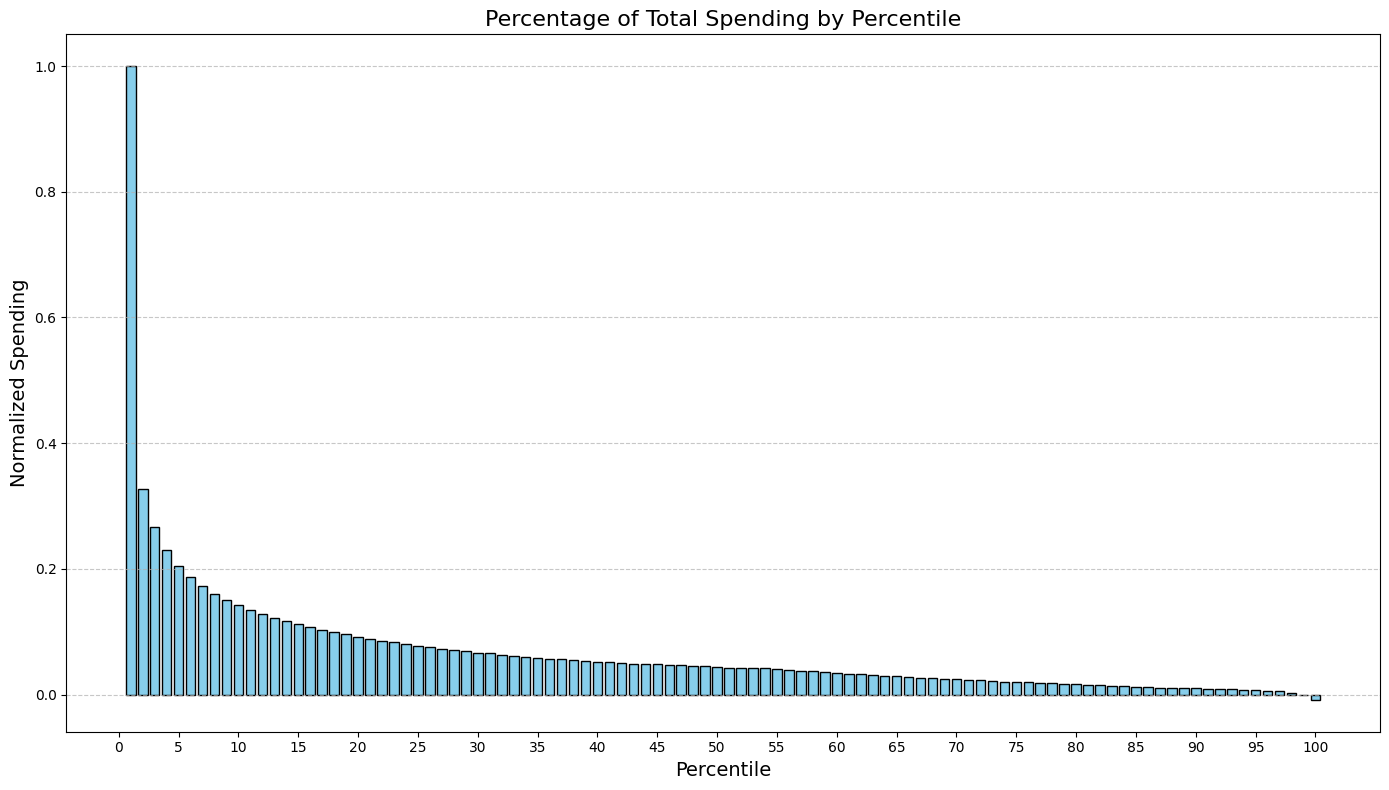

In [ ]:
# Columns to sum
spend_columns = ['merchandise_transaction_price']

# Group by 'fan_id', take the first for static and sum for spending
aggregations = {**{col: 'first' for col in static_columns}, **{col: 'sum' for col in spend_columns}}
grouped_df = df.groupby('fan_id').agg(aggregations).reset_index()

# Sort users by total spending
sorted_users = grouped_df.sort_values(by='merchandise_transaction_price', ascending=False)

# Calculate spending per percentile
percentile_spending = []
num_users = len(sorted_users)
for i in range(100):
    percentile_start = int(num_users * i / 100)
    percentile_end = int(num_users * (i + 1) / 100) - 1
    percentile_group = sorted_users.iloc[percentile_start:percentile_end]
    total_spending = percentile_group['merchandise_transaction_price'].sum()
    percentile_spending.append(total_spending)

# Normalize by maximum spending for better visualization
max_spending = max(percentile_spending)
percentile_spending_normalized = [x / max_spending for x in percentile_spending]

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(range(1, 101), percentile_spending_normalized, color='skyblue', edgecolor='black')

# Adding labels for clarity
plt.title('Percentage of Total Spending by Percentile', fontsize=16)
plt.xlabel('Percentile', fontsize=14)
plt.ylabel('Normalized Spending', fontsize=14)
plt.xticks(np.arange(0, 101, 5))  # Show marks every 5 percentiles

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:

#Write to an excel file
# Specify the file path to save the Excel file
excel_path = '/content/gdrive/MyDrive/DeepLearning/Grouped_Data.xlsx'

# Write the DataFrame to an Excel file
grouped_df.to_excel(excel_path, index=False)

print(f"Data successfully written to {excel_path}")